## <font color='orangered'>Testando a biblioteca **darts** com a base de dados do blog Cinetour - Viagem de Cinema</font>

**Darts** é uma biblioteca Python para previsão amigável e detecção de anomalias em séries temporais. Ele contém uma variedade de modelos, desde clássicos como ARIMA até redes neurais profundas.

Neste notebook, estou testando o passo a passo recomendado na página da web, onde você pode saber mais sobre este assunto acessando https://unit8co.github.io/darts/.

## <font color='blue'>Passo a passo</font>

**Parte 1:** Criando um objeto TimeSeries a partir de um Pandas DataFrame e dividindo-o em séries de treinamento/validação:

In [1]:
# pip install darts

In [2]:
# Pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.datasets import ETTh2Dataset
from darts.ad import KMeansScorer
from darts.ad import QuantileDetector

In [3]:
# Lendo a base de dados
df = pd.read_csv('dados/VC-ST_mes.csv', sep=';')
df.head()

,Meses,#Acessos
0,2010-06-01,33
1,2010-07-01,244
2,2010-08-01,166
3,2010-09-01,196
4,2010-10-01,347


In [4]:
# Criando a TimeSeries darts especificando as colunas de "data" e "acessos"
series = TimeSeries.from_dataframe(df, "Meses", "#Acessos")

In [5]:
# Separando os últimos 50 meses como uma base de validação
train, val = series[:-50], series[-50:]

**Parte 2:** Criando um modelo com Suavização Exponencial e fazendo uma previsão (probabilística) sobre a duração da série de validação:

C:\Users\mfran\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


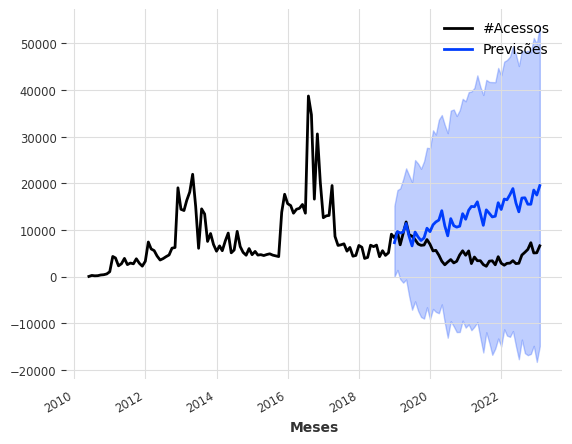

In [6]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

# Plotando a mediana, o 5º e 95º percentis:
series.plot()
prediction.plot(label="Previsões", low_quantile=0.05, high_quantile=0.95)
plt.legend()

**Parte 3:** Construindo um escore de anomalia k-means, treinando-o no conjunto de treinamento e usando-o no conjunto de validação para obter pontuações de anomalia:

In [7]:
scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

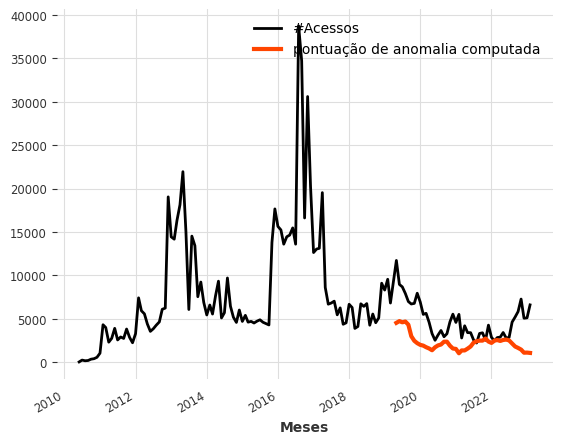

In [8]:
series.plot()
(anom_score / 2. - 100).plot(label="pontuação de anomalia computada", c="orangered", lw=3)

Bastante promissor. Um estímulo e tanto para eu continuar explorando essa biblioteca.